In [1]:
from utils import load_data, convert_to_single_label
import config as cfg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [2]:
users = load_data(format='pandas')
features = load_data(cfg.USER_FEATURES_FILE, format='pandas')
relations = load_data(cfg.USER_RELATIONS_FILE, format='pandas')
labels = load_data(cfg.USER_LABELS_FILE, format='pandas')

users = users.set_index('login')
features = features.set_index('username')
labels = labels.set_index('login')

In [3]:
labels = labels.apply(convert_to_single_label, axis=1)
labels = labels.idxmax(axis=1)

In [4]:
features

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002882,0.000000,0.000550,0.000209
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002462,0.004556,0.001276,0.004270
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007073,0.010934,0.004927,0.001082
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005449,0.000911,0.002851,0.007363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001677,0.001822,0.000375,0.002144
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.002278,0.001251,0.000493
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004034,0.027335,0.000600,0.000664


In [5]:
features

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002882,0.000000,0.000550,0.000209
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002462,0.004556,0.001276,0.004270
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007073,0.010934,0.004927,0.001082
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005449,0.000911,0.002851,0.007363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001677,0.001822,0.000375,0.002144
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.002278,0.001251,0.000493
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004034,0.027335,0.000600,0.000664


In [6]:
relations_subset = relations[relations.following.isin(labels.index) & relations.follow.isin(labels.index)]

In [9]:
lang_cols = [col for col in features.columns if 'languages' in col]
topic_cols = [col for col in features.columns if 'topics' in col]
comp_cols =  [col for col in features.columns if 'company' in col]
stat_cols =  [col for col in features.columns if 'stats' in col]

In [10]:
features[(features[topic_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.0,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.0,0.0,0.000,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002882,0.000000,0.000550,0.000209
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.0,0.0,0.019,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005449,0.000911,0.002851,0.007363
scazan,0.168,0.000,0.107,0.042,0.000,0.000,0.0,0.0,0.079,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003458,0.000456,0.001901,0.002144
dantehemerson,0.408,0.000,0.571,0.000,0.000,0.000,0.0,0.0,0.006,0.008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002253,0.014579,0.002151,0.002903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
emersonjsouza,0.379,0.250,0.096,0.000,0.234,0.000,0.0,0.0,0.000,0.037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002515,0.001822,0.000825,0.001423
ShayBox,0.000,0.250,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002148,0.001822,0.000950,0.001328
hsk81,0.200,0.116,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.001367,0.001075,0.000266


In [11]:
features[(features[lang_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002882,0.000000,0.000550,0.000209
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002462,0.004556,0.001276,0.004270
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007073,0.010934,0.004927,0.001082
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005449,0.000911,0.002851,0.007363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001677,0.001822,0.000375,0.002144
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.002278,0.001251,0.000493
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004034,0.027335,0.000600,0.000664


In [12]:
features[(features[comp_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.5,0.000,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
Zendq1998,0.268,0.250,0.457,0.006,0.0,0.000,0.0,0.000,0.006,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001781,0.000000,0.000850,0.000835
haczqyf,0.000,0.078,0.000,0.004,0.0,0.048,0.0,0.347,0.000,0.222,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000733,0.000000,0.000675,0.000873
sydnever,0.000,0.116,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000367,0.000000,0.000250,0.000304
scazan,0.168,0.000,0.107,0.042,0.0,0.000,0.0,0.000,0.079,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003458,0.000456,0.001901,0.002144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rohitnair987,0.007,0.001,0.223,0.293,0.0,0.001,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000210,0.000000,0.000125,0.000076
devpato,0.330,0.000,0.048,0.572,0.0,0.000,0.0,0.000,0.049,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010164,0.001367,0.008703,0.010475
matrush,0.000,0.209,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000576,0.000456,0.002051,0.000209


In [13]:
features[(features[stat_cols] > 0).any(axis=1)]

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002882,0.000000,0.000550,0.000209
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002462,0.004556,0.001276,0.004270
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007073,0.010934,0.004927,0.001082
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005449,0.000911,0.002851,0.007363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001677,0.001822,0.000375,0.002144
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.002278,0.001251,0.000493
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004034,0.027335,0.000600,0.000664


<AxesSubplot: >

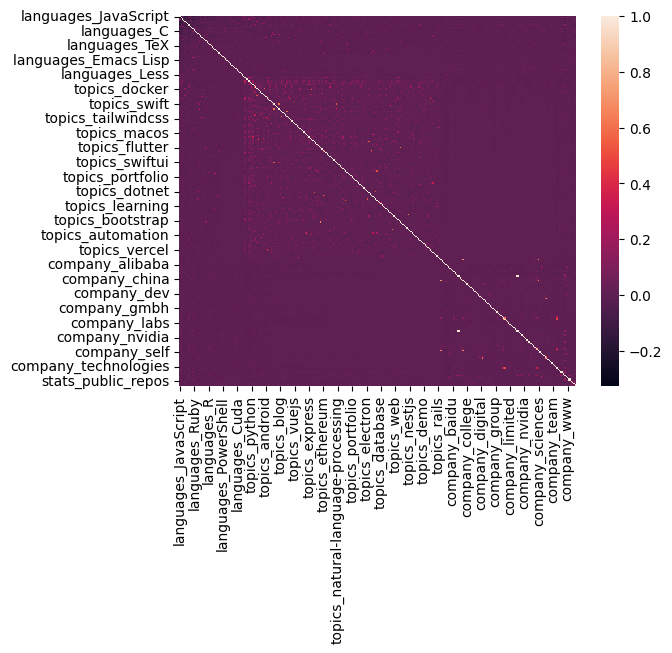

In [14]:
sns.heatmap(features.corr())

In [19]:
features.var().sort_values(ascending=False)

languages_JavaScript    0.057984
languages_Python        0.054502
company_university      0.048341
languages_TypeScript    0.030342
topics_react            0.022223
                          ...   
languages_Cuda          0.000128
languages_Blade         0.000110
stats_following         0.000086
stats_public_repos      0.000086
languages_Less          0.000071
Length: 304, dtype: float64

In [24]:
features

,languages_JavaScript,languages_Python,languages_TypeScript,languages_HTML,languages_Go,languages_Java,languages_PHP,languages_Jupyter Notebook,languages_CSS,languages_Shell,...,company_uber,company_university,company_web,company_www,company_zhejiang,company_zhejiang university,stats_public_repos,stats_public_gists,stats_followers,stats_following
username,,,,,,,,,,,,,,,,,,,,,
SaiNageswarS,0.000,0.000,0.250,0.000,0.500,0.000,0.000,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000995,0.000000,0.000450,0.000323
dennissiq,0.187,0.000,0.263,0.335,0.000,0.000,0.000,0.0,0.000,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002882,0.000000,0.000550,0.000209
guoyoujin,0.000,0.051,0.000,0.000,0.179,0.202,0.000,0.0,0.000,0.154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002462,0.004556,0.001276,0.004270
redshiftzero,0.000,0.423,0.000,0.071,0.000,0.000,0.000,0.0,0.000,0.017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007073,0.010934,0.004927,0.001082
pedrofsn,0.147,0.000,0.204,0.030,0.000,0.002,0.000,0.0,0.019,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005449,0.000911,0.002851,0.007363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LukeMichaels,0.373,0.000,0.000,0.091,0.000,0.000,0.252,0.0,0.032,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001677,0.001822,0.000375,0.002144
hemlok,0.531,0.000,0.452,0.015,0.000,0.000,0.000,0.0,0.002,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001729,0.002278,0.001251,0.000493
sfate,0.005,0.000,0.000,0.027,0.000,0.000,0.000,0.0,0.015,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004034,0.027335,0.000600,0.000664


In [27]:
labels.name = 'label'

In [30]:
X = features.merge(labels, left_index=True, right_index=True)

In [31]:
X, y = X.iloc[:, :-1], X['label']

In [107]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [92]:
X = PCA(n_components=50).fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [102]:
rf = RandomForestClassifier()

In [103]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
rf.score(X_train, y_train)

0.9998703319502075

In [108]:
y_pred = rf.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

            Data Engineer       1.00      0.05      0.09        21
           Data Scientist       0.58      0.09      0.15        81
Machine Learning Engineer       0.68      0.70      0.69       748
         Mobile Developer       0.68      0.45      0.55       222
          UI/UX Developer       0.00      0.00      0.00        17
            Web Developer       0.69      0.81      0.74       839

                 accuracy                           0.68      1928
                macro avg       0.60      0.35      0.37      1928
             weighted avg       0.67      0.68      0.66      1928



/home/tugrul/development/python/pr-course/github-job-title-prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tugrul/development/python/pr-course/github-job-title-prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tugrul/development/python/pr-course/github-job-title-prediction/.env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr